In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
data_red = pd.read_csv('/Users/pritthishchattopadhyay/Desktop/UCL/Introduction to Statistical Data Science(STAT0032)/Project/Data/winequality-red.csv',delimiter=';')
data_white = pd.read_csv('/Users/pritthishchattopadhyay/Desktop/UCL/Introduction to Statistical Data Science(STAT0032)/Project/Data/winequality-white.csv',delimiter=';')

In [4]:
mask_low_red = data_red.loc[(data_red['quality']<=4)]
mask_mid_red = data_red.loc[((data_red['quality']>4) & (data_red['quality']<7))]
mask_high_red = data_red.loc[(data_red['quality']>=7)]

mask_low_white = (data_white['quality']<=4)
mask_mid_white = ((data_white['quality']>4) & data_white['quality']<7)
mask_high_white = (data_white['quality']>=7)

In [5]:
mask_low_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.00,4
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.80,4
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.30,4
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10,4
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.20,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1480,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.10,4
1482,7.2,0.580,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.30,4
1484,6.8,0.910,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.90,4
1505,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [6]:
mask_high_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


In [7]:
np.random.seed(0)
mask_low_train,mask_low_test=train_test_split(mask_low_red,train_size=0.65,test_size=0.35,random_state=100)

In [8]:
mask_low_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1480 to 161
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         40 non-null     float64
 1   volatile acidity      40 non-null     float64
 2   citric acid           40 non-null     float64
 3   residual sugar        40 non-null     float64
 4   chlorides             40 non-null     float64
 5   free sulfur dioxide   40 non-null     float64
 6   total sulfur dioxide  40 non-null     float64
 7   density               40 non-null     float64
 8   pH                    40 non-null     float64
 9   sulphates             40 non-null     float64
 10  alcohol               40 non-null     float64
 11  quality               40 non-null     int64  
dtypes: float64(11), int64(1)
memory usage: 4.1 KB


In [9]:
mask_low_train.shape

(40, 12)

In [10]:
mask_low_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1235 to 813
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         23 non-null     float64
 1   volatile acidity      23 non-null     float64
 2   citric acid           23 non-null     float64
 3   residual sugar        23 non-null     float64
 4   chlorides             23 non-null     float64
 5   free sulfur dioxide   23 non-null     float64
 6   total sulfur dioxide  23 non-null     float64
 7   density               23 non-null     float64
 8   pH                    23 non-null     float64
 9   sulphates             23 non-null     float64
 10  alcohol               23 non-null     float64
 11  quality               23 non-null     int64  
dtypes: float64(11), int64(1)
memory usage: 2.3 KB


In [11]:
scaler=MinMaxScaler()
mask_low_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1480,5.6,0.62,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1,4
1307,6.8,0.68,0.09,3.9,0.068,15.0,29.0,0.99524,3.41,0.52,11.1,4
927,8.4,0.67,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2,4
1276,8.5,0.40,0.40,6.3,0.050,3.0,10.0,0.99566,3.28,0.56,12.0,4
517,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3


In [12]:
mask_low_train[:]=scaler.fit_transform(mask_low_train[:])
mask_low_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1480,0.126582,0.186441,0.03,0.058824,0.053571,0.090909,0.074627,0.213514,0.793103,0.173653,0.361702,1.0
1307,0.278481,0.237288,0.09,0.529412,0.032143,0.363636,0.313433,0.248649,0.577586,0.113772,0.574468,1.0
927,0.481013,0.228814,0.19,0.196078,0.076786,0.242424,1.000000,0.535135,0.396552,0.155689,0.170213,1.0
1276,0.493671,0.000000,0.40,1.000000,0.000000,0.000000,0.029851,0.305405,0.465517,0.137725,0.765957,1.0
517,0.734177,0.177966,0.49,0.176471,0.267857,0.060606,0.119403,0.810811,0.362069,0.179641,0.000000,0.0


In [13]:
mask_low_y_train=mask_low_train.pop('quality')
mask_low_x_train=mask_low_train

In [14]:
lm_model = LinearRegression()
lm_model.fit(mask_low_x_train, mask_low_y_train)
rfe_feature = RFE(lm_model,9)             
rfe_feature = rfe_feature.fit(mask_low_x_train, mask_low_y_train)

In [15]:
list(zip(mask_low_x_train.columns,rfe_feature.support_,rfe_feature.ranking_))

[('fixed acidity', True, 1),
 ('volatile acidity', True, 1),
 ('citric acid', True, 1),
 ('residual sugar', False, 3),
 ('chlorides', True, 1),
 ('free sulfur dioxide', False, 2),
 ('total sulfur dioxide', True, 1),
 ('density', True, 1),
 ('pH', True, 1),
 ('sulphates', True, 1),
 ('alcohol', True, 1)]

In [16]:
columns = mask_low_x_train.columns[rfe_feature.support_]
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [17]:
mask_low_x_train.columns[~rfe_feature.support_]

Index(['residual sugar', 'free sulfur dioxide'], dtype='object')

In [18]:
mask_low_red_X_train_rfe = mask_low_x_train[columns]

In [19]:
##### MODEL 1 #####

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_1 = pd.DataFrame()
vif_1['Features'] = mask_low_red_X_train_rfe.columns
vif_1['VIF'] = [variance_inflation_factor(mask_low_red_X_train_rfe.values, i) for i in range(mask_low_red_X_train_rfe.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
6,pH,19.13
0,fixed acidity,16.77
5,density,14.50
8,alcohol,9.83
2,citric acid,8.91
7,sulphates,7.86
3,chlorides,5.60
1,volatile acidity,5.16
4,total sulfur dioxide,3.06


In [20]:
import statsmodels.api as sm
mask_low_X_train_lm1 = sm.add_constant(mask_low_red_X_train_rfe)
model1 = sm.OLS(mask_low_y_train, mask_low_X_train_lm1).fit()

In [21]:
model1.params

const                   1.779364
fixed acidity          -0.301551
volatile acidity       -0.442443
citric acid            -0.441807
chlorides              -1.278514
total sulfur dioxide    0.400805
density                -0.531223
pH                     -1.295896
sulphates               0.946216
alcohol                 0.328260
dtype: float64

In [22]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     2.016
Date:                Fri, 04 Dec 2020   Prob (F-statistic):             0.0726
Time:                        01:51:02   Log-Likelihood:                -12.366
No. Observations:                  40   AIC:                             44.73
Df Residuals:                      30   BIC:                             61.62
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.7794 

In [23]:
mask_low_X_train_new = mask_low_red_X_train_rfe.drop(["density"], axis = 1)

In [24]:
##### MODEL 2 #####

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_1 = pd.DataFrame()
vif_1['Features'] = mask_low_X_train_new.columns
vif_1['VIF'] = [variance_inflation_factor(mask_low_X_train_new.values, i) for i in range(mask_low_X_train_new.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
5,pH,16.82
0,fixed acidity,9.93
2,citric acid,8.91
7,alcohol,8.46
6,sulphates,7.01
3,chlorides,5.58
1,volatile acidity,5.15
4,total sulfur dioxide,3.06


In [25]:
mask_low_X_train_lm2 = sm.add_constant(mask_low_X_train_new)
model2 = sm.OLS(mask_low_y_train, mask_low_X_train_lm2).fit()

In [26]:
model2.params

const                   1.834525
fixed acidity          -0.720330
volatile acidity       -0.467112
citric acid            -0.427098
chlorides              -1.241754
total sulfur dioxide    0.397136
pH                     -1.533982
sulphates               0.643296
alcohol                 0.509567
dtype: float64

In [27]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     2.073
Date:                Fri, 04 Dec 2020   Prob (F-statistic):             0.0698
Time:                        01:51:28   Log-Likelihood:                -13.255
No. Observations:                  40   AIC:                             44.51
Df Residuals:                      31   BIC:                             59.71
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.8345 

In [28]:
mask_low_X_train_new = mask_low_X_train_new.drop(["chlorides"], axis = 1)

In [29]:
##### MODEL 3 #####

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_1 = pd.DataFrame()
vif_1['Features'] = mask_low_X_train_new.columns
vif_1['VIF'] = [variance_inflation_factor(mask_low_X_train_new.values, i) for i in range(mask_low_X_train_new.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
4,pH,16.82
0,fixed acidity,8.28
6,alcohol,8.13
2,citric acid,7.17
1,volatile acidity,3.97
5,sulphates,3.59
3,total sulfur dioxide,3.04


In [30]:
mask_low_X_train_lm3 = sm.add_constant(mask_low_X_train_new)
model3 = sm.OLS(mask_low_y_train, mask_low_X_train_lm3).fit()

In [31]:
model3.params

const                   1.646484
fixed acidity          -0.335026
volatile acidity       -0.734143
citric acid            -0.912796
total sulfur dioxide    0.436096
pH                     -1.343706
sulphates              -0.075016
alcohol                 0.654345
dtype: float64

In [32]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     1.900
Date:                Fri, 04 Dec 2020   Prob (F-statistic):              0.102
Time:                        01:51:49   Log-Likelihood:                -14.874
No. Observations:                  40   AIC:                             45.75
Df Residuals:                      32   BIC:                             59.26
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.6465 

In [34]:
mask_low_X_train_new = mask_low_X_train_new.drop(["citric acid"], axis = 1)

In [35]:
##### MODEL 4 #####

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_1 = pd.DataFrame()
vif_1['Features'] = mask_low_X_train_new.columns
vif_1['VIF'] = [variance_inflation_factor(mask_low_X_train_new.values, i) for i in range(mask_low_X_train_new.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
3,pH,14.07
5,alcohol,7.71
1,volatile acidity,3.67
0,fixed acidity,3.42
2,total sulfur dioxide,2.77
4,sulphates,2.58


In [36]:
mask_low_X_train_lm4 = sm.add_constant(mask_low_X_train_new)
model4 = sm.OLS(mask_low_y_train, mask_low_X_train_lm4).fit()
model4.params
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1.757
Date:                Fri, 04 Dec 2020   Prob (F-statistic):              0.139
Time:                        01:52:36   Log-Likelihood:                -16.281
No. Observations:                  40   AIC:                             46.56
Df Residuals:                      33   BIC:                             58.38
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.6798 

In [37]:
mask_low_X_train_new = mask_low_X_train_new.drop(["total sulfur dioxide"], axis = 1)

##### MODEL 5 #####

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_1 = pd.DataFrame()
vif_1['Features'] = mask_low_X_train_new.columns
vif_1['VIF'] = [variance_inflation_factor(mask_low_X_train_new.values, i) for i in range(mask_low_X_train_new.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
2,pH,12.42
4,alcohol,7.28
1,volatile acidity,3.52
0,fixed acidity,3.22
3,sulphates,2.15


In [38]:
mask_low_X_train_lm5 = sm.add_constant(mask_low_X_train_new)
model5 = sm.OLS(mask_low_y_train, mask_low_X_train_lm5).fit()
model5.params
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1.691
Date:                Fri, 04 Dec 2020   Prob (F-statistic):              0.163
Time:                        01:52:38   Log-Likelihood:                -17.384
No. Observations:                  40   AIC:                             46.77
Df Residuals:                      34   BIC:                             56.90
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.7398      0.512  

In [39]:
mask_low_X_train_new = mask_low_X_train_new.drop(["sulphates"], axis = 1)

##### MODEL 6 #####

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_1 = pd.DataFrame()
vif_1['Features'] = mask_low_X_train_new.columns
vif_1['VIF'] = [variance_inflation_factor(mask_low_X_train_new.values, i) for i in range(mask_low_X_train_new.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
2,pH,12.39
3,alcohol,7.05
1,volatile acidity,3.52
0,fixed acidity,2.41


In [40]:
mask_low_X_train_lm6 = sm.add_constant(mask_low_X_train_new)
model6 = sm.OLS(mask_low_y_train, mask_low_X_train_lm6).fit()
model6.params
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2.066
Date:                Fri, 04 Dec 2020   Prob (F-statistic):              0.106
Time:                        01:52:40   Log-Likelihood:                -17.587
No. Observations:                  40   AIC:                             45.17
Df Residuals:                      35   BIC:                             53.62
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.5726      0.423  

In [41]:
mask_low_X_train_new = mask_low_X_train_new.drop(["fixed acidity"], axis = 1)

##### MODEL 7 #####

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_1 = pd.DataFrame()
vif_1['Features'] = mask_low_X_train_new.columns
vif_1['VIF'] = [variance_inflation_factor(mask_low_X_train_new.values, i) for i in range(mask_low_X_train_new.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
1,pH,10.55
2,alcohol,7.01
0,volatile acidity,3.52


In [42]:
mask_low_X_train_lm7 = sm.add_constant(mask_low_X_train_new)
model7 = sm.OLS(mask_low_y_train, mask_low_X_train_lm7).fit()
model7.params
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.576
Date:                Fri, 04 Dec 2020   Prob (F-statistic):              0.212
Time:                        01:52:41   Log-Likelihood:                -19.359
No. Observations:                  40   AIC:                             46.72
Df Residuals:                      36   BIC:                             53.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9240      0.228  

In [43]:
mask_low_X_train_new = mask_low_X_train_new.drop(["pH"], axis = 1)

##### MODEL 8 #####

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_1 = pd.DataFrame()
vif_1['Features'] = mask_low_X_train_new.columns
vif_1['VIF'] = [variance_inflation_factor(mask_low_X_train_new.values, i) for i in range(mask_low_X_train_new.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
0,volatile acidity,2.29
1,alcohol,2.29


In [44]:
mask_low_X_train_lm8 = sm.add_constant(mask_low_X_train_new)
model8 = sm.OLS(mask_low_y_train, mask_low_X_train_lm8).fit()
model8.params
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     2.216
Date:                Fri, 04 Dec 2020   Prob (F-statistic):              0.123
Time:                        01:52:42   Log-Likelihood:                -19.564
No. Observations:                  40   AIC:                             45.13
Df Residuals:                      37   BIC:                             50.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8284      0.163  

In [45]:
model8.params

const               0.828401
volatile acidity   -0.615247
alcohol             0.328854
dtype: float64

In [217]:
#The one with highest F-statistic is selected as the model. I have tried 8 models and the best F-statistic is with volatile acidity and alcohol.

In [46]:
#Equation = quality = .828401 - (volatile acidity* 0.615247) + (alcohol*0.328854)

In [47]:
mask_low_test[:]=scaler.fit_transform(mask_low_test[:])

In [48]:
mask_low_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1235,0.181818,0.116279,0.592593,1.000000,0.130435,0.078947,0.946429,0.266667,0.237288,0.188406,1.00,1.0
872,0.418182,0.139535,0.444444,0.052174,0.318841,0.657895,0.366071,0.272222,0.457627,0.159420,0.40,1.0
224,0.618182,0.470930,0.666667,0.052174,0.637681,0.315789,0.428571,0.506944,0.254237,0.202899,0.56,1.0
1461,0.218182,0.645349,0.000000,0.060870,0.217391,0.078947,0.053571,0.394444,0.728814,0.260870,0.40,1.0
1467,0.309091,0.941860,0.148148,0.078261,0.318841,0.421053,0.223214,0.372222,0.610169,0.202899,0.80,1.0


In [49]:
mask_low_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1235,0.181818,0.116279,0.592593,1.000000,0.130435,0.078947,0.946429,0.266667,0.237288,0.188406,1.00,1.0
872,0.418182,0.139535,0.444444,0.052174,0.318841,0.657895,0.366071,0.272222,0.457627,0.159420,0.40,1.0
224,0.618182,0.470930,0.666667,0.052174,0.637681,0.315789,0.428571,0.506944,0.254237,0.202899,0.56,1.0
1461,0.218182,0.645349,0.000000,0.060870,0.217391,0.078947,0.053571,0.394444,0.728814,0.260870,0.40,1.0
1467,0.309091,0.941860,0.148148,0.078261,0.318841,0.421053,0.223214,0.372222,0.610169,0.202899,0.80,1.0
703,0.454545,0.174419,0.888889,0.104348,0.405797,0.500000,0.687500,0.472222,0.271186,0.391304,0.24,1.0
876,0.381818,0.279070,0.000000,0.069565,0.318841,0.105263,0.062500,0.190278,0.406780,0.217391,0.76,1.0
79,0.600000,0.459302,0.370370,0.008696,0.507246,0.631579,1.000000,0.472222,0.000000,1.000000,0.04,1.0
199,0.345455,1.000000,0.111111,0.060870,0.231884,0.236842,0.214286,0.138889,0.593220,0.000000,0.96,1.0
1521,0.345455,0.290698,0.370370,0.043478,0.536232,0.157895,0.142857,0.284722,0.389831,0.000000,0.02,1.0


In [50]:
mask_low_y_test = mask_low_test.pop('quality')
mask_low_X_test = mask_low_test
mask_low_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1235 to 813
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         23 non-null     float64
 1   volatile acidity      23 non-null     float64
 2   citric acid           23 non-null     float64
 3   residual sugar        23 non-null     float64
 4   chlorides             23 non-null     float64
 5   free sulfur dioxide   23 non-null     float64
 6   total sulfur dioxide  23 non-null     float64
 7   density               23 non-null     float64
 8   pH                    23 non-null     float64
 9   sulphates             23 non-null     float64
 10  alcohol               23 non-null     float64
dtypes: float64(11)
memory usage: 2.2 KB


In [51]:
mask_low_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.475099,0.525531,0.344605,0.110775,0.453056,0.275744,0.316770,0.389130,0.389094,0.195337,0.473913
std,0.249134,0.302487,0.323929,0.201152,0.246540,0.247102,0.296199,0.222715,0.226331,0.199140,0.327827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.345455,0.284884,0.074074,0.052174,0.275362,0.078947,0.102679,0.269444,0.245763,0.086957,0.240000
50%,0.418182,0.470930,0.370370,0.060870,0.478261,0.236842,0.214286,0.394444,0.372881,0.173913,0.400000
75%,0.590909,0.808140,0.546296,0.073913,0.579710,0.394737,0.401786,0.486111,0.466102,0.210145,0.780000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
columns1=mask_low_X_train_new.columns
mask_low_X_test=mask_low_X_test[columns1]
# Adding constant variable to test dataframe
mask_low_X_test_lm8 = sm.add_constant(mask_low_X_test)
mask_low_X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1235 to 813
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             23 non-null     float64
 1   volatile acidity  23 non-null     float64
 2   alcohol           23 non-null     float64
dtypes: float64(3)
memory usage: 736.0 bytes


In [53]:
mask_low_y_pred = model8.predict(mask_low_X_test_lm8)

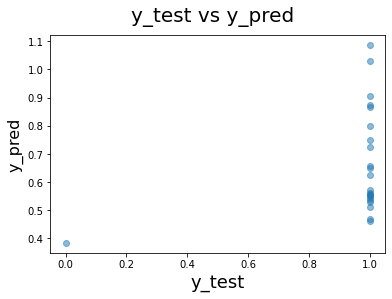

In [54]:
fig = plt.figure()
plt.scatter(mask_low_y_test, mask_low_y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [55]:
df= pd.DataFrame({'Actual':mask_low_y_test,'Predictions':mask_low_y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
1235,1.0,1.09
872,1.0,0.87
224,1.0,0.72
1461,1.0,0.56
1467,1.0,0.51


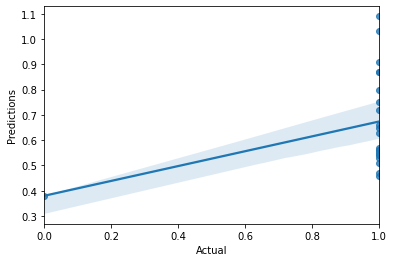

In [56]:
sns.regplot('Actual','Predictions',data=df)

In [57]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(mask_low_y_test, mask_low_y_pred))
print('MSE:', metrics.mean_squared_error(mask_low_y_test, mask_low_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(mask_low_y_test, mask_low_y_pred)))

MAE: 0.33901940640178213
MSE: 0.13841213296049001
RMSE: 0.3720378111973164
